### importing important libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report, roc_auc_score, confusion_matrix

### loading data

In [8]:
address = "C:/Users/hp/Desktop/Kifya/Week_8&9/Data/raw/"
df = pd.read_csv(address + "creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


split the data

In [9]:
x = df.select_dtypes(include=['int', 'float']).drop(columns=['Class'], errors='ignore')
y = df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

train the models

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Regression
RMSE:  0.020382009058670693
R2_score:  -10.867355911132034
f1_score:  0.5606629850726458
accuracy score:  0.9796179909413293
AUC: 0.9388589531197961
classification_report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55713  1151]
 [   10    88]]


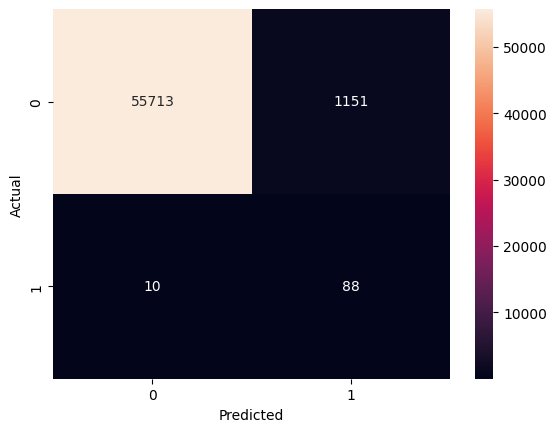

Random Forest
RMSE:  0.00047400021066676027
R2_score:  0.724014978810883
f1_score:  0.9299331123258168
accuracy score:  0.9995259997893332
AUC: 0.9233638728423278
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56852    12]
 [   15    83]]


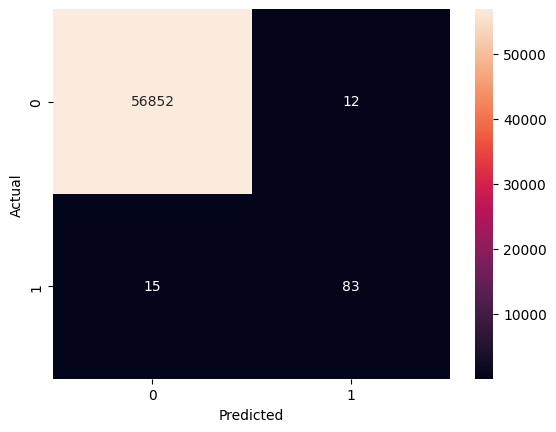

In [11]:
models = {
    "Linear Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(Y_test, preds)
    r2 = r2_score(Y_test, preds)
    f1 = f1_score(Y_test, preds, average='macro')
    accuracy = accuracy_score(Y_test, preds)
    auc = roc_auc_score(Y_test, preds)
    print(name)
    print(f"RMSE:  {rmse}")
    print(f"R2_score:  {r2}")
    print(f"f1_score:  {f1}")
    print(f"accuracy score:  {accuracy}")
    print(f"AUC: {auc}")

    print(f"classification_report:  {classification_report(Y_test,preds)}")
    cm = confusion_matrix(Y_test, preds)
    print("Confusion Matrix:")
    print(cm)

    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    